<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Zahra Ghayour Hallaj

**Student ID**: 400101689

## Importing Libraries

First we import libraries that we need for this assignment.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os
from sklearn.model_selection import train_test_split

# import any other libraries needed below

In [3]:
drive.mount('/content/drive')
path = os.path.join('/content/drive/MyDrive/Uni/6 semester/machine learning/', 'Q3')

Mounted at /content/drive


## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [4]:
X, Y = None, None
### START CODE HERE ###

# Read the data from the CSV file
data = pd.read_csv(os.path.join(path, 'data2_logistic.csv'))
# Extract the features (X) and the target (Y)
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:
Reasons for Normalizing Data:
1. Improves Convergence: Normalizing the data helps in improving the convergence of optimization algorithms during model training. It ensures that the optimization process is more stable and efficient.When the features have vastly different scales, the optimization process can become inefficient, as the gradients for the different features will have very different magnitudes.
2. Balances Features: Normalization brings all features to a similar scale, preventing certain features from dominating the learning process due to their larger magnitudes. This helps in achieving a more balanced and fair learning process.This is especially important for models that rely on distance-based computations, such as k-nearest neighbors (KNN) or support vector machines (SVMs), where features with larger ranges can dominate the distance metric.
3. Enhances Model Performance: Normalization can lead to better model performance by allowing the model to learn the underlying patterns in the data more effectively. It can prevent issues like vanishing gradients in deep neural networks and overflow or underflow, when used as input to certain machine learning models.
4. Interpretability: Normalized data makes it easier to interpret the importance of features in the model. It ensures that the model assigns appropriate weights to each feature based on their relative importance.
5. Avoiding Numerical Issues: Unnormalized data can sometimes lead to numerical issues, such as overflow or underflow, when used as input to certain machine learning models. Normalization helps to avoid these problems by ensuring that the data is within a reasonable range, typically between 0 and 1.
6. Preventing Data Leakage: If you normalize the data after splitting it into training and test sets, you can inadvertently introduce data leakage, where information from the test set is used to influence the training process. This can lead to overly optimistic performance estimates. Normalizing the data before the split ensures that the test set remains completely independent.

In summary, normalizing the data before training a machine learning model is a crucial step that helps to avoid numerical issues, prevent data leakage, improve model convergence, balance feature importance, and enhance model interpretability. By taking the time to properly preprocess the data, you can improve the overall performance and reliability of your machine learning models.


In [5]:
# Calculate the mean and standard deviation of each feature in X
mean_X = X.mean(axis=0)
std_X = X.std(axis=0)

# Normalize the feature matrix X
X = (X - mean_X) / std_X

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [6]:
# Add a column of 1s to the feature matrix X to represent the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))
print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [7]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''

    return 1 / (1 + np.exp(-Z))

In [8]:
# Test the sigmoid function with a single value
print(sigmoid(0))  # Output: 0.5
print(sigmoid(100))  # Output: 1.0
print(sigmoid(-100))  # Output: 3.7200759760208356e-44

# Test the sigmoid function with a vector
z = np.array([-100, -10, 0, 10, 100])
print(sigmoid(z))
# Output: [3.72007598e-44 4.53978687e-05 5.00000000e-01 9.99954602e-01 1.00000000e+00]

# Test the sigmoid function with a matrix
z = np.array([[-100, -10, 0],[1, 10, 100]])
print(sigmoid(z))
# Output: [[3.72007598e-44 4.53978687e-05 5.00000000e-01] [7.31058579e-01 9.99954602e-01 1.00000000e+00]]

0.5
1.0
3.7200759760208356e-44
[3.72007598e-44 4.53978687e-05 5.00000000e-01 9.99954602e-01
 1.00000000e+00]
[[3.72007598e-44 4.53978687e-05 5.00000000e-01]
 [7.31058579e-01 9.99954602e-01 1.00000000e+00]]


### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [9]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    m, n = X.shape
    loss = None
    h = sigmoid(np.dot(X, theta))
    term1 = -y * np.log(h)
    term2 = -(1 - y) * np.log(1 - h)
    regularization = regLambda / 2 * np.sum(theta[1:]**2)  # Exclude theta0 from regularization
    loss = np.sum(term1 + term2) / m + regularization
    return loss


### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

For the $j^{th}$ element of the gradient of the cost function with respect to $\theta_j$ (for $j=1...d$), the expression is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = (\sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)}).x_j^{(i)})+{\lambda}.\theta_j
$$

where:
* $\mathcal{h}_\theta(\mathbf{x}^{(i)})$ is the predicted value for the $i^{th}$ instance,
* $y^{(i)}$ is the actual label for the $i^{th}$instance,
* $x_j^{(i)}$ is the $j^{th}$ feature of the $i^{th}$ instance,
* $\lambda$ is the regularization parameter,
* $\theta_j$ is the $j^{th}$ parameter of the model.

This expression represents the gradient of the cost function with respect to the $j^{th}$ parameter $\theta_j$ in logistic regression with L2 regularization. It includes the contribution from the difference between the predicted and actual values, as well as the regularization term to prevent overfitting.

In [10]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''

    m, n = X.shape
    grad = None
    h = sigmoid(np.dot(X, theta))
    error = h - y
    grad = np.dot(X.T, error) / m
    grad[1:] += (regLambda / m) * theta[1:]  # Regularization term excluding theta0
    return grad


### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [11]:
def fit(X, y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100):
    """
    Trains the logistic regression model.

    Arguments:
        X (numpy.ndarray): A n-by-d numpy matrix of the input features.
        y (numpy.ndarray): An n-dimensional numpy vector of the target labels.
        regLambda (float): The scalar regularization constant.
        alpha (float): The gradient descent learning rate.
        epsilon (float): The convergence rate.
        maxNumIters (int): The maximum number of gradient descent iterations.

    Returns:
        numpy.ndarray: The trained theta parameters.
        numpy.ndarray: The history of the loss values during training.
    """
    m, n = X.shape
    theta, loss_history = None, None

    theta = np.zeros(n)
    loss_history = []
    theta_old = theta.copy()
    while True:
        grad =  computeGradient(theta, X, y, regLambda)
        theta_new = theta - alpha * grad
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)
        if hasConverged(theta_old, theta_new, epsilon):
            break

        if len(loss_history) >= maxNumIters:
            break
        theta_old = theta.copy()
        theta = theta_new

    return theta, loss_history

def hasConverged(theta_old, theta_new, epsilon):
    """
    Return if the theta has converged or not.

    Arguments:
        theta_old (numpy.ndarray): The theta calculated in the previous iteration.
        theta_new (numpy.ndarray): The theta calculated in the current iteration.
        epsilon (float): The convergence rate.

    Returns:
        bool: True if the theta has converged, False otherwise.
    """
    theta_diff = np.linalg.norm(theta_new - theta_old)
    return theta_diff <= epsilon


Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

Loss History:
Iteration 1: Loss = 0.6931
Iteration 2: Loss = 0.6914
Iteration 3: Loss = 0.6896
Iteration 4: Loss = 0.6879
Iteration 5: Loss = 0.6861
Iteration 6: Loss = 0.6844
Iteration 7: Loss = 0.6827
Iteration 8: Loss = 0.6810
Iteration 9: Loss = 0.6793
Iteration 10: Loss = 0.6776
Iteration 11: Loss = 0.6759
Iteration 12: Loss = 0.6742
Iteration 13: Loss = 0.6725
Iteration 14: Loss = 0.6709
Iteration 15: Loss = 0.6692
Iteration 16: Loss = 0.6676
Iteration 17: Loss = 0.6659
Iteration 18: Loss = 0.6643
Iteration 19: Loss = 0.6627
Iteration 20: Loss = 0.6611
Iteration 21: Loss = 0.6595
Iteration 22: Loss = 0.6579
Iteration 23: Loss = 0.6563
Iteration 24: Loss = 0.6547
Iteration 25: Loss = 0.6532
Iteration 26: Loss = 0.6516
Iteration 27: Loss = 0.6500
Iteration 28: Loss = 0.6485
Iteration 29: Loss = 0.6470
Iteration 30: Loss = 0.6454
Iteration 31: Loss = 0.6439
Iteration 32: Loss = 0.6424
Iteration 33: Loss = 0.6409
Iteration 34: Loss = 0.6394
Iteration 35: Loss = 0.6379
Iteration 36: L

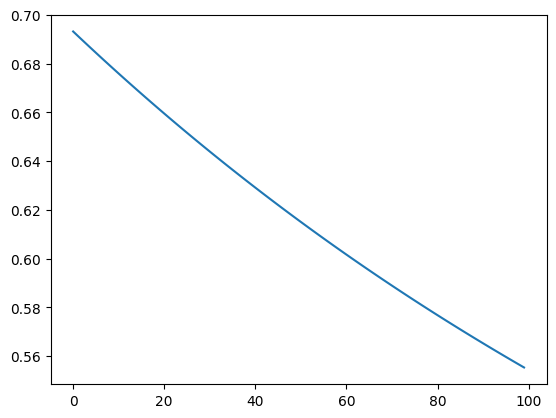

In [12]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

# Print the loss of each iteration
print("Loss History:")
for i, loss in enumerate(loss_history):
    print(f"Iteration {i+1}: Loss = {loss:.4f}")

# Print the final theta
print("\nFinal Theta:")
print(theta)
plt.plot(loss_history)

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [13]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None
### START CODE HERE ###
# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.333333333333, random_state=42)
### END CODE HERE ###

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 7000
Validation set size: 2000
Test set size: 1000


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [14]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    h = sigmoid(np.dot(X, theta))
    Y = (h >= 0.5).astype(int)

    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

###Effect of Learning Rate and Regularization Constant:
1. Learning Rate:
 * The learning rate is one of the most important hyperparameters to tune in training a logistic regression model.
 * A traditional default value for the learning rate is 0.1 or 0.01, but the optimal value is data-dependent and should be found through experimentation.
 * Smaller learning rates require more training epochs, while larger learning rates require fewer epochs but may cause the model to overshoot the optimal solution.
 * The range of values to consider for the learning rate is typically less than 1.0 and greater than 10^-6.
2. Regularization Constant (Lambda):
 * The regularization constant controls the impact of the L2 regularization term, which helps prevent overfitting.
 * A higher value of lambda tends to drive the feature weights closer to 0, resulting in a simpler model.
 * However, setting lambda too high can lead to underfitting, while setting it too low can lead to overfitting.
 * The optimal value of lambda is also data-dependent and should be found through cross-validation or by holding out a portion of the training data.
 * Common practice is to try a range of values for lambda, such as 0.01, 0.02, ..., 0.4.
 * For very large models with a large number of parameters, other regularization methods like dropout may be more effective than L2 regularization.

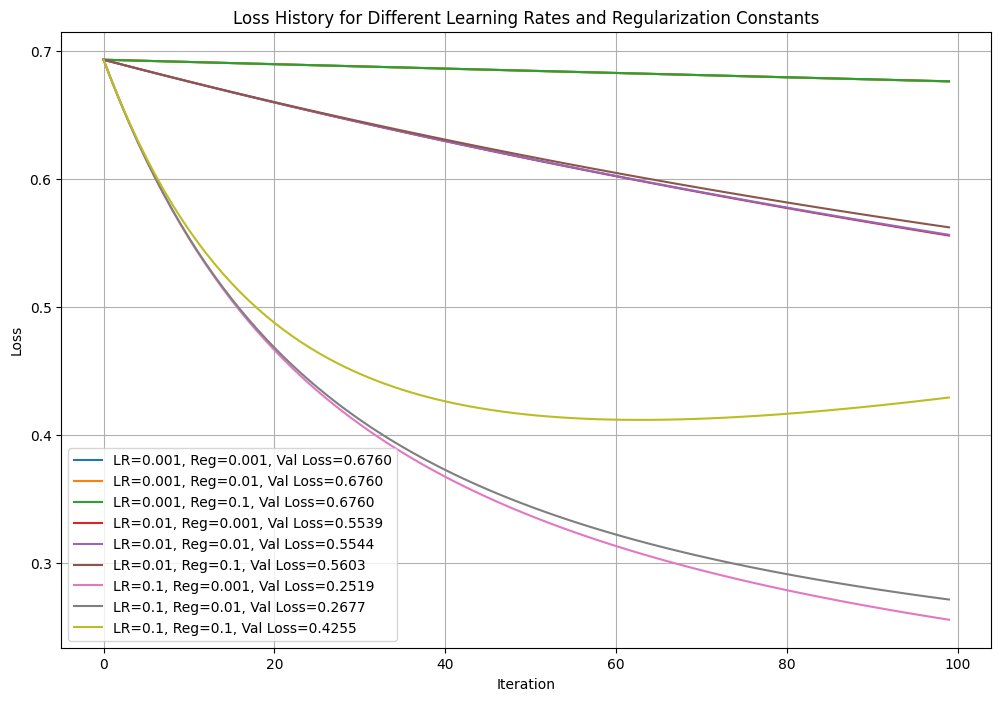

Best Learning Rate: 0.1
Best Regularization Constant: 0.001
Best Validation Loss: 0.2519


In [15]:
# Split the data into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3333333, random_state=42)

# Define the range of learning rates and regularization constants to test
learning_rates = [0.001, 0.01, 0.1]
reg_constants = [0.001, 0.01, 0.1]

# Create a figure to plot the loss history
plt.figure(figsize=(12, 8))

# Iterate over the learning rates and regularization constants
best_val_loss = float('inf')
best_lr = None
best_reg_lambda = None
for lr in learning_rates:
    for reg_lambda in reg_constants:
        # Train the model
        theta, loss_history = fit(X_train, y_train, regLambda=reg_lambda, alpha=lr)

        # Compute the validation loss
        val_loss = computeCost(theta, X_val, y_val, regLambda=reg_lambda)

        # Update the best parameters
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lr = lr
            best_reg_lambda = reg_lambda

        # Plot the loss history
        label = f"LR={lr}, Reg={reg_lambda}, Val Loss={val_loss:.4f}"
        plt.plot(loss_history, label=label)

# Add labels, title, and legend
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Learning Rate: {best_lr}")
print(f"Best Regularization Constant: {best_reg_lambda}")
print(f"Best Validation Loss: {best_val_loss:.4f}")

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 92.30%

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train the GaussianNB classifier on the training set
clf = GaussianNB()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9230


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Train the LinearDiscriminantAnalysis classifier on the training set
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9650


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:Based on the results obtained from the two classification methods we have explored, the best method for classifying this dataset is the Linear Discriminant Analysis (LDA) classifier.

1. **Naive Bayes (GaussianNB):**
   - The GaussianNB classifier achieved a test accuracy of 92.30% on the dataset.
   - Naive Bayes is a simple and efficient algorithm, but it may not perform as well when the feature dependencies are strong or the data does not follow the assumed Gaussian distributions.

2. **Linear Discriminant Analysis (LDA):**
   - The LDA classifier achieved a test accuracy of 96.50% on the dataset.
   - LDA is a more powerful and flexible classifier that can capture the underlying structure of the data by finding a linear combination of features that best separates the classes.
   - LDA performed better than the Naive Bayes approach, likely because the data is better suited to the Gaussian distribution and equal covariance matrix assumptions of the LDA model.

Therefore, the best method for classifying this dataset is the Linear Discriminant Analysis (LDA) classifier, which achieved the highest test accuracy of 96.50%.

The key advantages of the LDA classifier for this dataset are:

- It can effectively capture the linear relationships between the features and the target variable.
- It makes fewer assumptions about the data distribution compared to Naive Bayes, which allows it to better fit the underlying structure of the dataset.
- It provides a more robust and accurate classification performance, as evidenced by the higher test accuracy.

In conclusion, the Linear Discriminant Analysis (LDA) classifier is the best method for classifying this dataset, with a test accuracy of 96.50% on the provided data.